In [1]:
%matplotlib ipympl
from models import *
# from models import find_index_of_nearest
from impedance.preprocessing import readCSV, readBioLogic
from impedance.visualization import plot_nyquist,plot_bode
from impedance.models.circuits import CustomCircuit
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
# from arbitau import give_z_for_arbitary_tau, tau_plotter
from scipy.integrate import solve_bvp
# import mps
import mpmath as mp


In [2]:
# @element(num_params=4,units=["","","","",""],overwrite=True)
# def arbitRCPEone(p,f):
#     Q, alpha, a, b = p[0], p[1], p[2], p[3]
    
#     def R(x):
#         # return a/(1+b*x)
#         return 100*(a*np.tanh(b**2-a*x)+np.tanh(a-b**2*x))
    
#     def fun(x,y,lmdcos,lmdsin):
#         return np.vstack((y[2]*R(x),y[3]*R(x),lmdcos*y[0]-lmdsin*y[1],lmdcos*y[1]+lmdsin*y[0]))

#     def bc(ya,yb):
#         return np.array([ya[0]-1,yb[2],yb[3],ya[1]])

#     x=np.linspace(0,1,1000)
#     y=np.zeros((4,x.size))
 
#     Z_list=np.zeros((np.size(np.array(f))),dtype=complex)
#     ii=0
#     for freq in np.array(f):
#         w=2*np.pi*freq
#         lmdcos=w**alpha*Q*np.cos(alpha*np.pi/2)
#         lmdsin=w**alpha*Q*np.sin(alpha*np.pi/2)
#         sol1 = solve_bvp(lambda x,y: fun(x,y,lmdcos=lmdcos,lmdsin=lmdsin), bc, x, y)
#         y3=sol1.sol(x)[2]
#         y4=sol1.sol(x)[3]
#         Z=2/(-(y3[0]+y4[0]*1j))
#         Z_list[ii]=Z
#         ii=ii+1
#     return Z_list


In [4]:
freq_range=np.logspace(0,2,100)

In [5]:
#common Params
Q=6e-4
alpha=0.9

In [6]:
#prof 1
aone=4
bone=4
paramone=[Q,alpha,aone,bone]

cone=CustomCircuit(initial_guess=paramone,circuit="arbitRCPEone")
zone=cone.predict(frequencies=freq_range)

ValueError: arbitRCPEone not in allowed elements (dict_keys(['s', 'p', 'R', 'C', 'L', 'W', 'Wo', 'Ws', 'CPE', 'La', 'G', 'Gs', 'K', 'Zarc', 'TLMQ', 'T', 'TLMuni', 'TLMtwo', 'TLMlinnew', 'TLMlinzert', 'TLMilin', 'TLMilinnew', 'TLMilinzert']))

In [7]:
#prof 2

atwo=1000
btwo=1
paramtwo=[Q,alpha,atwo,btwo]

ctwo=CustomCircuit(initial_guess=paramtwo,circuit="arbitRCPEtwo")
ztwo=ctwo.predict(frequencies=freq_range)

ValueError: arbitRCPEtwo not in allowed elements (dict_keys(['s', 'p', 'R', 'C', 'L', 'W', 'Wo', 'Ws', 'CPE', 'La', 'G', 'Gs', 'K', 'Zarc', 'TLMQ', 'T', 'TLMuni', 'TLMtwo', 'TLMlinnew', 'TLMlinzert', 'TLMilin', 'TLMilinnew', 'TLMilinzert']))

In [ ]:
# plt.cla()
# plt.plot(np.real(ztwo),-np.imag(ztwo))
# plt.gca().set_aspect("equal")
# plt.show()

In [8]:
R1=1000
R2=500
Q=6e-4
alpha=0.9
delta=0.2063

paramstep=[R1,R1*Q,R2*Q,delta,alpha]
paramlin=[R1,R1*Q,R2*Q,alpha]
paramilin=[R1,R1*Q,(R2-100)*Q,alpha]

# cstep=CustomCircuit(initial_guess=paramstep,circuit="TLMtwo",constants={"TLMtwo_3":0.2063, "TLMtwo_4":0.9})
cstep=CustomCircuit(initial_guess=paramstep,circuit="TLMtwo")
# clin=CustomCircuit(initial_guess=paramlin,circuit="TLMlinnew",constants={"TLMlinnew_3":0.9})
clin=CustomCircuit(initial_guess=paramlin,circuit="TLMlinnew")
# cilin=CustomCircuit(initial_guess=paramilin,circuit="TLMilinnew",constants={"TLMilinnew_3":0.9})
cilin=CustomCircuit(initial_guess=paramilin,circuit="TLMilinnew")


In [9]:
#step case
mp.dps=100
wt="mod"
#wt="prop"

def give_weights(z,wt):
    if (wt=="mod"):
        return np.concatenate((np.abs(z),np.abs(z)))
    elif (wt=="prop"):
        return np.concatenate((np.real(z),np.imag(z)))
    elif (wt=="" or wt=="unit"):
        return np.ones(2*len(z))

cstep.fit(impedance=ztwo,frequencies=freq_range,sigma=give_weights(ztwo,wt))

R1_two_ft=cstep.parameters_[0]
Q_two=cstep.parameters_[1]/cstep.parameters_[0]
R2_two_ft=cstep.parameters_[2]/Q_two
alpha_two=cstep.parameters_[3]
# cstep.parameters_[0]

# print(cstep)
print("two")
print("R1",R1_two_ft)
print("R2",R2_two_ft)
print("Q",Q_two)

NameError: name 'ztwo' is not defined

In [ ]:
delta_two=cstep.parameters_[3]
alpha_two=cstep.parameters_[4]


print("two")
print("R1",R1_two_ft)
print("R2",R2_two_ft)
print("Q",Q_two)
print("delta",delta_two)
print("α",alpha_two)
# print("delta",Q_two)
# print("",Q_two)


two_fit_prof1={"R1":R1_two_ft,"R2":R2_two_ft,"Q":Q_two,"delta":delta_two,"alpha":alpha_two}
import json 
tft=json.dumps(two_fit_prof1) 
with open('two_fit_prof2.json',"w") as file:
    file.write(tft)

# two_fit_object=cstep
# tfobject=json.dumps(cstep)
# with open('two_fit_object_prof1.json',"w") as file:
#     file.write(tfobject)

two
R1 883.0865447594549
R2 666.3502666314596
Q 0.0006166784087174589
delta 0.2837241962351937
α 0.8815337612103218


In [ ]:
#lin case
mp.dps=100
clin.fit(impedance=ztwo,frequencies=freq_range,sigma=give_weights(ztwo,wt))
R1_lin_ft=clin.parameters_[0]
Q_lin=clin.parameters_[1]/cstep.parameters_[0]
R2_lin_ft=clin.parameters_[2]/Q_lin

print(clin)
# print(R1_lin,R2_lin)



Circuit string: TLMlinnew
Fit: True

Initial guesses:
  TLMlinnew_0 = 1.00e+03 [Ohm]
  TLMlinnew_1 = 6.00e-01 [Ohm F]
  TLMlinnew_2 = 3.00e-01 [Ohm F]
  TLMlinnew_3 = 9.00e-01 []

Fit parameters:
  TLMlinnew_0 = 9.57e+02  (+/- 5.79e-01) [Ohm]
  TLMlinnew_1 = 5.79e-01  (+/- 4.14e-04) [Ohm F]
  TLMlinnew_2 = 2.24e-01  (+/- 1.00e-03) [Ohm F]
  TLMlinnew_3 = 8.94e-01  (+/- 1.34e-04) []



In [ ]:
# delta_two=cstep.parameters_[3]
alpha_lin=clin.parameters_[3]

print("lin")
print("R1",R1_lin_ft)
print("R2",R2_lin_ft)
print("Q",Q_lin)
# print("delta",delta_two)
print("α",alpha_lin) 

lin_fit_prof1={"R1":R1_lin_ft,"R2":R2_lin_ft,"Q":Q_lin,"alpha":alpha_lin}
import json 
tft=json.dumps(lin_fit_prof1) 
with open('lin_fit_prof2.json',"w") as file:
    file.write(tft)

lin
R1 956.9752371802457
R2 341.82566685158207
Q 0.0006551343417161876
α 0.8935547346781575


In [ ]:
#ilin case
mp.dps=100
cilin.fit(impedance=ztwo,frequencies=freq_range,sigma=give_weights(ztwo,wt))
R1_ilin_ft=cilin.parameters_[0]
Q_ilin=cilin.parameters_[1]/cstep.parameters_[0]
R2_ilin_ft=cilin.parameters_[2]/Q_ilin

print(cilin)


Circuit string: TLMilinnew
Fit: True

Initial guesses:
  TLMilinnew_0 = 1.00e+03 [Ohm]
  TLMilinnew_1 = 6.00e-01 [Ohm F]
  TLMilinnew_2 = 2.40e-01 [Ohm F]
  TLMilinnew_3 = 9.00e-01 []

Fit parameters:
  TLMilinnew_0 = 1.00e+03  (+/- 1.40e-02) [Ohm]
  TLMilinnew_1 = 6.00e-01  (+/- 1.77e-06) [Ohm F]
  TLMilinnew_2 = 2.40e-01  (+/- 3.66e-06) [Ohm F]
  TLMilinnew_3 = 9.00e-01  (+/- 1.46e-06) []



In [ ]:
alpha_ilin=cilin.parameters_[3]
print("ilin")
print("R1",R1_ilin_ft)
print("R2",R2_ilin_ft)
print("Q",Q_ilin)
# print("delta",delta_two)
print("α",alpha_ilin) 
ilin_fit_prof1={"R1":R1_ilin_ft,"R2":R2_ilin_ft,"Q":Q_ilin,"alpha":alpha_ilin}
import json
tft=json.dumps(ilin_fit_prof1) 
with open('ilin_fit_prof2.json',"w") as file:
    file.write(tft)

ilin
R1 999.9978684782109
R2 353.24185937388916
Q 0.0006794333363510598
α 0.8999998886082334


4.8

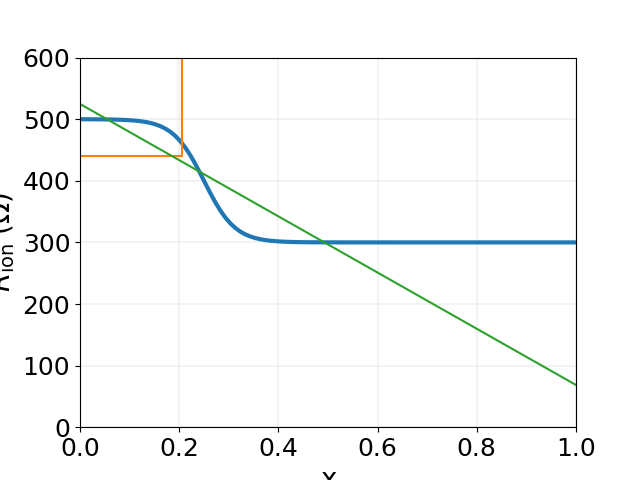

In [ ]:
fig1, axx= plt.subplots()
x=np.linspace(0,1,100)
a=4
b=4
def R(x):
    return 100*(a*np.tanh(b**2-a*x)+np.tanh(a-b**2*x))
#plot the arbitray profile
axx.plot(x,R(x),label="Test profile 1",linewidth=3)
# axx.plot(x,R(x))
#plot the fitted profiles
axx.plot([0,delta,delta,1],[R1_two,R1_two,R2_two,R2_two],label="Two-step")
# axx.set_title("Test profile 1")
# axx.set_title("Inverse-Linear resistance profile")
# axx.set_title("Linear resistance profile")
axx.plot([0,1],[R1_lin,R2_lin],label="Linear")

# def R_ilin(x):
#     return 1/(1/R1_ilin+(1/R2_ilin-1/R1_ilin)*x)
# axx.plot(x,R_ilin(x),label="Inverse Linear")

# axx.set_xlim(0,)
axx.set_ylim(0,600)
axx.set_xlim(0,1)
axx.tick_params(labelsize=18)
axx.set_xlabel("x",fontsize=20)
# axx.set_title("Fitted Elementary Profiles")
# axx.set_ylabel("$R_{\mathrm{ion},1}$ or $R_{\mathrm{ion},2}\;$($\Omega$)",fontsize=20)
axx.set_ylabel("$R_{\mathrm{ion}}$$\;$($\Omega$)",fontsize=20)
# axx.legend(fontsize=16,handlelength=0.8)
axx.grid(linewidth=0.2)

# axx.set_title("Fittde")
# fig1.savefig("fitted_prof1.png",dpi=500)
fig1.savefig("figs/two_lin_prof1.png",dpi=500,bbox_inches="tight")
fig1.get_figwidth()
fig1.get_figheight()